## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [1]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 7       8       7       7       4       

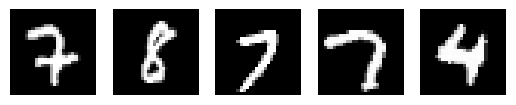

In [3]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(60000,-1)                                      # flatten the images of training set
x_test_flatten = x_test.reshape(10000,-1)                                       # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:10000]
y_validation = y_train[:10000]

x_train_flatten = x_train_flatten[10000:]
y_train = y_train[10000:]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [9]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout

In [11]:
model = keras.models.Sequential([
    Dense(64,activation="relu",input_shape=(784,)),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(128,activation="relu"),
    Dropout(0.3),
    Dense(10,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [12]:
model.compile(optimizer="adam",loss = "crossentropy",metrics=["accuracy"])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

n_epochs = 50             # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_validation,y_validation))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2919 - loss: 17.8522 - val_accuracy: 0.6094 - val_loss: 1.2582
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6542 - loss: 1.2525 - val_accuracy: 0.8165 - val_loss: 0.7874
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8120 - loss: 0.7906 - val_accuracy: 0.8599 - val_loss: 0.5985
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8526 - loss: 0.6163 - val_accuracy: 0.8833 - val_loss: 0.4601
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8800 - loss: 0.4831 - val_accuracy: 0.8931 - val_loss: 0.4073
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8886 - loss: 0.4401 - val_accuracy: 0.9057 - val_loss: 0.3645
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9038 - loss: 0.3811 - val_accuracy: 0.9069 - val_loss: 0.3522
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9084 - loss: 0.3607 - val_accuracy: 0.9131 - 

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9421 - loss: 0.2356
Loss =  0.20216670632362366
Accuracy =  95.09999752044678 %


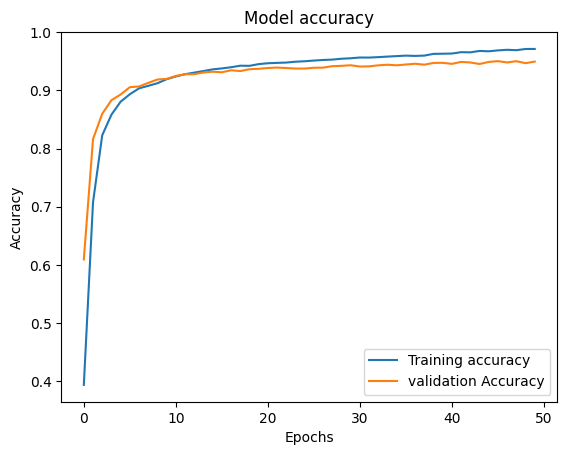

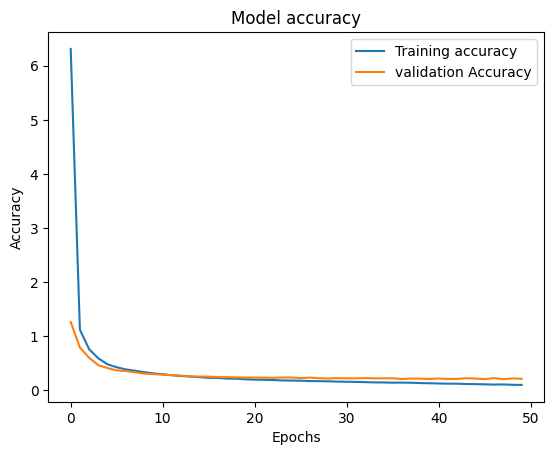

In [15]:
results = model.evaluate(x_test_flatten,y_test)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history["loss"], label="Training accuracy")
plt.plot(history.history["val_loss"], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
0           3           9           3           8           

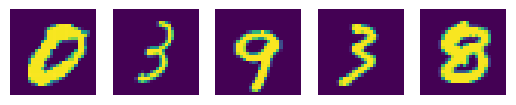

Predicted value: 
0            3            9            3            8            

In [22]:
n = 5   # = no. of images to see predictions on

index = np.random.choice(10000,n)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind].reshape(28,28))             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="           ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...
    pred=model.predict(x_test_flatten[ind].reshape(1,784),verbose=0)
    digit = np.argmax(pred)
    print(digit,end="            ")